## Setup

In [1]:
!git clone https://github.com/JH083/16831-F25-HW.git
%cd 16831-F25-HW/hw1

Cloning into '16831-F25-HW'...
remote: Enumerating objects: 331, done.
remote: Counting objects: 100% (331/331), done.
remote: Compressing objects: 100% (245/245), done.
remote: Total 331 (delta 116), reused 266 (delta 65), pack-reused 0 (from 0)
Receiving objects: 100% (331/331), 7.00 MiB | 10.50 MiB/s, done.
Resolving deltas: 100% (116/116), done.
/content/16831-F25-HW/hw1


In [2]:
!pwd
!ls rob831/scripts/run_hw1.py

/content/16831-F25-HW/hw1
rob831/scripts/run_hw1.py


In [3]:
!apt-get update -y
!apt-get install -y patchelf libosmesa6 libosmesa6-dev libgl1-mesa-dev libgl1-mesa-glx libglu1-mesa libglew-dev libglfw3

# MuJoCo 2.1.0 (the version mujoco-py expects)
!mkdir -p /root/.mujoco && cd /root/.mujoco && \
  wget -q https://mujoco.org/download/mujoco210-linux-x86_64.tar.gz && \
  tar -xzf mujoco210-linux-x86_64.tar.gz && rm mujoco210-linux-x86_64.tar.gz

# Environment for headless rendering + library lookup (persists for future shell cmds)
%env MUJOCO_PY_MUJOCO_PATH=/root/.mujoco/mujoco210
%env MUJOCO_GL=osmesa
%env LD_LIBRARY_PATH=/root/.mujoco/mujoco210/bin:/usr/lib/x86_64-linux-gnu:$LD_LIBRARY_PATH
%env LD_PRELOAD=/usr/lib/x86_64-linux-gnu/libOSMesa.so:/root/.mujoco/mujoco210/bin/libglewosmesa.so

Get:1 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:2 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:3 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Hit:4 https://cli.github.com/packages stable InRelease
Get:5 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:7 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease [18.1 kB]
Get:9 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:12 http://security.ubuntu.com/ubuntu jammy-security/multiverse amd64 Packages [71.0 kB]
Get:13 http://security.ubuntu.com/ubuntu jammy-security/universe amd64 Pac

In [4]:
!apt-get install -y python3.8 python3.8-dev python3.8-venv
!python3.8 -m venv /usr/local/py38
!/usr/local/py38/bin/python -V

# Install pip that supports Python 3.8
!curl -sS https://bootstrap.pypa.io/pip/3.8/get-pip.py -o /tmp/get-pip.py
!/usr/local/py38/bin/python /tmp/get-pip.py

# Keep toolchain versions that still support py38
!/usr/local/py38/bin/pip install --upgrade "pip<24.3" "setuptools<70" wheel

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libpython3.8 libpython3.8-dev libpython3.8-minimal libpython3.8-stdlib
  python3.8-distutils python3.8-lib2to3 python3.8-minimal
Suggested packages:
  binfmt-support
The following NEW packages will be installed:
  libpython3.8 libpython3.8-dev libpython3.8-minimal libpython3.8-stdlib
  python3.8 python3.8-dev python3.8-distutils python3.8-lib2to3
  python3.8-minimal python3.8-venv
0 upgraded, 10 newly installed, 0 to remove and 43 not upgraded.
Need to get 14.7 MB of archives.
After this operation, 48.0 MB of additional disk space will be used.
Get:1 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy/main amd64 libpython3.8-minimal amd64 3.8.20-1+jammy1 [796 kB]
Get:2 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy/main amd64 python3.8-minimal amd64 3.8.20-1+jammy1 [2,023 kB]
Get:3 https://ppa.launchpadcontent.net

In [5]:
# Pin NumPy/Cython for mujoco-py & gym 0.25.1
!/usr/local/py38/bin/pip install numpy==1.24.4 "Cython<3.0"

# Gym + notices
!/usr/local/py38/bin/pip install gym==0.25.1 gym-notices

# mujoco-py (OpenAI bindings) + glfw Python wrapper
!/usr/local/py38/bin/pip install mujoco-py==2.1.2.14 glfw

# Logging/plotting
!/usr/local/py38/bin/pip install tensorboard==2.10.0 tensorboardX==2.5.1

# PyTorch CPU wheels that support py38
!/usr/local/py38/bin/pip install torch==1.12.1+cpu torchvision==0.13.1+cpu -f https://download.pytorch.org/whl/torch_stable.html

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 92.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 47.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 732.2/732.2 kB 12.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for gym: filename=gym-0.25.1-py3-none-any.whl size=849019 sha256=eb9f49fc79800db667c04a9b67fb6f48cd163e272f43840755fca31ca7198c1f
  Stored in directory: /root/.cache/pip/wheels/cc/73/13/48bbc89268e1515e9e26f60c50ee870632c700c75cf7a53fbe
Successfully built gym
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 29.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 91.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 19.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 

In [6]:
# Create Python 3.8 venv in Colab
!python3 -m venv /usr/local/py38
!/usr/local/py38/bin/python -m pip install --upgrade pip==24.0

# Core versions compatible with mujoco-py + gym 0.25.1
!/usr/local/py38/bin/pip install numpy==1.24.4 "Cython<3.0"
!/usr/local/py38/bin/pip install gym==0.25.1 gym-notices
!/usr/local/py38/bin/pip install mujoco-py==2.1.2.14 glfw
!/usr/local/py38/bin/pip install tensorboard==2.10.0 tensorboardX==2.5.1 "matplotlib==3.7.5"
!/usr/local/py38/bin/pip install torch==1.12.1+cpu torchvision==0.13.1+cpu -f https://download.pytorch.org/whl/torch_stable.html

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 18.1 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.2
    Uninstalling pip-24.2:
      Successfully uninstalled pip-24.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.3/102.3 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.2/9.2 MB 55.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.1/301.1 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 51.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 25.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.5/66.5 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.1/104.1 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 229.9/229.9 kB 7.2 MB/s eta 0:00:00
Looking in links: https://download.pytorch.org/whl/torch_stable.html


In [7]:
%%bash
set -e
mkdir -p /root/.mujoco
cd /root/.mujoco
# If not downloaded yet:
[ -f mujoco210-linux-x86_64.tar.gz ] || wget -q https://mujoco.org/download/mujoco210-linux-x86_64.tar.gz
# Extract if not already done
[ -d mujoco210 ] || tar -xzf mujoco210-linux-x86_64.tar.gz
# Make sure the linker can find it
echo '/root/.mujoco/mujoco210/bin' >/etc/ld.so.conf.d/mujoco210.conf
ldconfig

/sbin/ldconfig.real: /usr/local/lib/libtcm_debug.so.1 is not a symbolic link

/sbin/ldconfig.real: /usr/local/lib/libhwloc.so.15 is not a symbolic link

/sbin/ldconfig.real: /usr/local/lib/libtbbmalloc.so.2 is not a symbolic link

/sbin/ldconfig.real: /usr/local/lib/libumf.so.0 is not a symbolic link

/sbin/ldconfig.real: /usr/local/lib/libtbbbind_2_0.so.3 is not a symbolic link

/sbin/ldconfig.real: /usr/local/lib/libtbbbind.so.3 is not a symbolic link

/sbin/ldconfig.real: /usr/local/lib/libur_adapter_level_zero.so.0 is not a symbolic link

/sbin/ldconfig.real: /usr/local/lib/libtbb.so.12 is not a symbolic link

/sbin/ldconfig.real: /usr/local/lib/libur_adapter_opencl.so.0 is not a symbolic link

/sbin/ldconfig.real: /usr/local/lib/libtbbbind_2_5.so.3 is not a symbolic link

/sbin/ldconfig.real: /usr/local/lib/libtcm.so.1 is not a symbolic link

/sbin/ldconfig.real: /usr/local/lib/libtbbmalloc_proxy.so.2 is not a symbolic link

/sbin/ldconfig.real: /usr/local/lib/libur_adapter_level_

In [8]:
%%bash
set -e
export MUJOCO_GL=osmesa
export LD_LIBRARY_PATH=/root/.mujoco/mujoco210/bin:/usr/lib/x86_64-linux-gnu
export LD_PRELOAD=/usr/lib/x86_64-linux-gnu/libOSMesa.so:/root/.mujoco/mujoco210/bin/libglewosmesa.so

/usr/local/py38/bin/python - <<'PY'
import gym, mujoco_py, numpy as np
print("Gym:", gym.__version__)
print("NumPy:", np.__version__)
# Importing mujoco_py should compile once and succeed
from mujoco_py import load_model_from_path
print("mujoco_py import OK")
PY

Compiling /usr/local/py38/lib/python3.8/site-packages/mujoco_py/cymj.pyx because it changed.
[1/1] Cythonizing /usr/local/py38/lib/python3.8/site-packages/mujoco_py/cymj.pyx
Gym: 0.25.1
NumPy: 1.24.4
mujoco_py import OK


Gym has been unmaintained since 2022 and does not support NumPy 2.0 amongst other critical functionality.
Please upgrade to Gymnasium, the maintained drop-in replacement of Gym, or contact the authors of your software and request that they upgrade.
See the migration guide at https://gymnasium.farama.org/introduction/migration_guide/ for additional information.
/usr/local/py38/lib/python3.8/site-packages/Cython/Distutils/old_build_ext.py:15: DeprecationWarning: dep_util is Deprecated. Use functions from setuptools instead.
  from distutils.dep_util import newer, newer_group


In [9]:
%%bash
/usr/local/py38/bin/pip uninstall -y gym
/usr/local/py38/bin/pip install "gym==0.23.1"

Found existing installation: gym 0.25.1
Uninstalling gym-0.25.1:
  Successfully uninstalled gym-0.25.1
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 626.2/626.2 kB 6.7 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for gym: filename=gym-0.23.1-py3-none-any.whl size=701345 sha256=8a74d9a4da3a2226696fc1caf3703a2a116fa08bf7502a84286a57c16917186f
  Stored in directory: /root/.cache/pip/wheels/78/28/77/b0c74e80a2a4faae0161d5c53bc4f8e436e77aedc79136ee13
Successfully built gym


In [10]:
%%bash

# This should: make Ant-v2, step 5 steps, close, and print OK.
export MUJOCO_GL=osmesa
export LD_LIBRARY_PATH=/root/.mujoco/mujoco210/bin:/usr/lib/x86_64-linux-gnu
export LD_PRELOAD=/usr/lib/x86_64-linux-gnu/libOSMesa.so:/root/.mujoco/mujoco210/bin/libglewosmesa.so

/usr/local/py38/bin/python - <<'PY'
import gym, os
os.environ["MUJOCO_GL"]="osmesa"
env = gym.make("Ant-v2")
obs = env.reset()
for _ in range(5):
    a = env.action_space.sample()
    obs, rew, done, info = env.step(a)
env.close()
print("Ant-v2 step OK")
PY

Ant-v2 step OK


Gym has been unmaintained since 2022 and does not support NumPy 2.0 amongst other critical functionality.
Please upgrade to Gymnasium, the maintained drop-in replacement of Gym, or contact the authors of your software and request that they upgrade.
See the migration guide at https://gymnasium.farama.org/introduction/migration_guide/ for additional information.
/usr/local/py38/lib/python3.8/site-packages/gym/envs/registration.py:505: UserWarning: WARN: The environment Ant-v2 is out of date. You should consider upgrading to version `v3` with the environment ID `Ant-v3`.
  logger.warn(
/usr/local/py38/lib/python3.8/site-packages/Cython/Distutils/old_build_ext.py:15: DeprecationWarning: dep_util is Deprecated. Use functions from setuptools instead.
  from distutils.dep_util import newer, newer_group


In [16]:
import pickle, numpy as np, os

root = "/content/16831-F25-HW/hw1/rob831/expert_data"
envs = ["Ant-v2", "Humanoid-v2", "Walker2d-v2", "Hopper-v2", "HalfCheetah-v2"]

rows = []
for env in envs:
    path = os.path.join(root, f"expert_data_{env}.pkl")
    with open(path, "rb") as f:
        data = pickle.load(f)

    # data is a list of trajectory dicts; each dict has 'returns' or similar
    # Inspect the first element's keys to be sure:
    print(env, "sample keys:", data[0].keys())

    # Many homework repos use key 'returns' (single float) or 'ep_returns'
    # Let's handle common cases:
    rets = []
    for traj in data:
        if "returns" in traj:
            rets.append(traj["returns"])
        elif "episode_returns" in traj:
            rets.append(traj["episode_returns"])
        elif "reward" in traj:         # fallback if it's a list of per-step rewards
            rets.append(sum(traj["reward"]))
        else:
            # if no obvious key, skip or print for manual check
            print(f"Check keys for {env}: {traj.keys()}")
    rets = np.array(rets)
    rows.append((env, rets.mean(), rets.std()))

print("\nLaTeX table:")
print("\\begin{table}[h]")
print("\\centering")
print("\\begin{tabular}{lcc}")
print("\\toprule")
print("Environment & Mean Return & Std. Dev. \\\\")
print("\\midrule")
for env, m, s in rows:
    print(f"{env} & {m:.2f} & {s:.2f} \\\\")
print("\\bottomrule")
print("\\end{tabular}")
print("\\caption{{Expert policy performance: mean and std of return over two trajectories.}}")
print("\\end{table}")


Ant-v2 sample keys: dict_keys(['observation', 'image_obs', 'reward', 'action', 'next_observation', 'terminal'])
Humanoid-v2 sample keys: dict_keys(['observation', 'image_obs', 'reward', 'action', 'next_observation', 'terminal'])
Walker2d-v2 sample keys: dict_keys(['observation', 'image_obs', 'reward', 'action', 'next_observation', 'terminal'])
Hopper-v2 sample keys: dict_keys(['observation', 'image_obs', 'reward', 'action', 'next_observation', 'terminal'])
HalfCheetah-v2 sample keys: dict_keys(['observation', 'image_obs', 'reward', 'action', 'next_observation', 'terminal'])

LaTeX table:
\begin{table}[h]
\centering
\begin{tabular}{lcc}
\toprule
Environment & Mean Return & Std. Dev. \\
\midrule
Ant-v2 & 4713.65 & 12.20 \\
Humanoid-v2 & 10344.53 & 20.98 \\
Walker2d-v2 & 5566.85 & 9.24 \\
Hopper-v2 & 3772.67 & 1.95 \\
HalfCheetah-v2 & 4205.78 & 83.04 \\
\bottomrule
\end{tabular}
\caption{{Expert policy performance: mean and std of return over two trajectories.}}
\end{table}


## Question 1 Part 2

In [13]:
import pickle, numpy as np, os

root = "/content/16831-F25-HW/hw1/rob831/expert_data"
envs = ["Ant-v2", "Humanoid-v2", "Walker2d-v2", "Hopper-v2", "HalfCheetah-v2"]

log_path = os.path.join(root, "expert_summary.log")
with open(log_path, "w") as out:
    for env in envs:
        path = os.path.join(root, f"expert_data_{env}.pkl")
        with open(path, "rb") as f:
            data = pickle.load(f)

        # collect returns
        rets = []
        for traj in data:
            if "returns" in traj:
                rets.append(traj["returns"])
            elif "episode_returns" in traj:
                rets.append(traj["episode_returns"])
            elif "reward" in traj:
                rets.append(sum(traj["reward"]))
        rets = np.array(rets)

        # summary text
        summary = (
            f"=== {env} (expert data) — Summary ===\n"
            f"MeanReturn : {rets.mean():.4f}\n"
            f"StdReturn  : {rets.std():.4f}\n"
            f"MaxReturn  : {rets.max():.4f}\n"
            f"MinReturn  : {rets.min():.4f}\n"
            "------------------------------\n"
        )

        # print to console and append to log
        print(summary, end="")
        out.write(summary)

print(f"\n[log] Full summary saved to: {log_path}")

=== Ant-v2 (expert data) — Summary ===
MeanReturn : 4713.6528
StdReturn  : 12.1978
MaxReturn  : 4725.8506
MinReturn  : 4701.4551
------------------------------
=== Humanoid-v2 (expert data) — Summary ===
MeanReturn : 10344.5254
StdReturn  : 20.9761
MaxReturn  : 10365.5020
MinReturn  : 10323.5498
------------------------------
=== Walker2d-v2 (expert data) — Summary ===
MeanReturn : 5566.8467
StdReturn  : 9.2383
MaxReturn  : 5576.0850
MinReturn  : 5557.6084
------------------------------
=== Hopper-v2 (expert data) — Summary ===
MeanReturn : 3772.6702
StdReturn  : 1.9470
MaxReturn  : 3774.6172
MinReturn  : 3770.7231
------------------------------
=== HalfCheetah-v2 (expert data) — Summary ===
MeanReturn : 4205.7773
StdReturn  : 83.0378
MaxReturn  : 4288.8154
MinReturn  : 4122.7397
------------------------------

[log] Full summary saved to: /content/16831-F25-HW/hw1/rob831/expert_data/expert_summary.log


## Question 1 Part 3

In [53]:
%%bash
cd /content/16831-F25-HW/hw1

# ensure Python can import the rob831 package
touch rob831/__init__.py rob831/infrastructure/__init__.py rob831/scripts/__init__.py
export PYTHONPATH=.

# stable headless Mujoco (no noisy LD_PRELOAD)
export MUJOCO_GL=osmesa
unset LD_PRELOAD
export LD_LIBRARY_PATH=/root/.mujoco/mujoco210/bin:/usr/lib/x86_64-linux-gnu

# Run BC for Ant-v2.  --video_log_freq -1 disables large video files.
# n_iter must be 1 for plain BC (q1_)
/usr/local/py38/bin/python rob831/scripts/run_hw1.py \
  --expert_policy_file rob831/policies/experts/Ant.pkl \
  --expert_data rob831/expert_data/expert_data_Ant-v2.pkl \
  --env_name Ant-v2 \
  --exp_name bc_ant \
  --n_iter 1 \
  --n_layers 5 \
  --learning_rate 4e-3 \
  --eval_batch_size 5000 \
  --video_log_freq -1 \
  --no_gpu

########################
logging outputs to  /content/16831-F25-HW/hw1/rob831/scripts/../../data/q1_bc_ant_Ant-v2_19-09-2025_18-29-48
########################
GPU not detected. Defaulting to CPU.
Loading expert policy from... rob831/policies/experts/Ant.pkl
obs (1, 111) (1, 111)
Done restoring expert policy...


********** Iteration 0 ************

Loading expert data from rob831/expert_data/expert_data_Ant-v2.pkl...

Training agent using sampled data from replay buffer...

Beginning logging procedure...

Eval_AverageReturn : 4601.8125
Eval_StdReturn : 126.97118377685547
Eval_MaxReturn : 4722.7880859375
Eval_MinReturn : 4379.6083984375
Eval_AverageEpLen : 1000.0
Train_AverageReturn : 4713.6533203125
Train_StdReturn : 12.196533203125
Train_MaxReturn : 4725.849609375
Train_MinReturn : 4701.45654296875
Train_AverageEpLen : 1000.0
Train_EnvstepsSoFar : 0
TimeSinceStart : 6.969757080078125
Training Loss : 0.0015974269481375813
Initial_DataCollection_AverageReturn : 4713.6533203125
Done logg

Gym has been unmaintained since 2022 and does not support NumPy 2.0 amongst other critical functionality.
Please upgrade to Gymnasium, the maintained drop-in replacement of Gym, or contact the authors of your software and request that they upgrade.
See the migration guide at https://gymnasium.farama.org/introduction/migration_guide/ for additional information.
/usr/local/py38/lib/python3.8/site-packages/gym/envs/registration.py:505: UserWarning: WARN: The environment Ant-v2 is out of date. You should consider upgrading to version `v3` with the environment ID `Ant-v3`.
  logger.warn(
/usr/local/py38/lib/python3.8/site-packages/Cython/Distutils/old_build_ext.py:15: DeprecationWarning: dep_util is Deprecated. Use functions from setuptools instead.
  from distutils.dep_util import newer, newer_group


In [51]:
%%bash
# Quiet, resilient run that writes full logs to a file and prints a short summary
set -e
cd /content/16831-F25-HW/hw1

# ensure package imports work
touch rob831/__init__.py rob831/infrastructure/__init__.py rob831/scripts/__init__.py
export PYTHONPATH=.

# stable headless GL (no noisy LD_PRELOAD)
export MUJOCO_GL=osmesa
unset LD_PRELOAD
export LD_LIBRARY_PATH=/root/.mujoco/mujoco210/bin:/usr/lib/x86_64-linux-gnu

# hush Python warnings in the notebook (full logs still saved)
export PYTHONWARNINGS=ignore
export TF_CPP_MIN_LOG_LEVEL=3

LOG="data/p4_ant_test_console.log"
mkdir -p data

# Run and capture ALL output to the log; don't spam the notebook
# Allow exit 134 (mujoco-py teardown) without failing the cell
EXIT=0
/usr/local/py38/bin/python -W ignore rob831/scripts/run_hw1.py \
  --expert_policy_file rob831/policies/experts/Ant.pkl \
  --expert_data rob831/expert_data/expert_data_Ant-v2.pkl \
  --env_name Ant-v2 \
  --exp_name p4_ant_test \
  --n_iter 1 \
  --learning_rate 4e-3 \
  --n_layers 5 \
  --eval_batch_size 5000 \
  --video_log_freq -1 \
  --no_gpu > "$LOG" 2>&1 || EXIT=$?

# Minimal, readable summary
echo "=== Ant-v2 (p4_ant_test) — Summary ==="
grep -E \
 '^(Eval|Train)_(AverageReturn|StdReturn|MaxReturn|MinReturn)|^Training Loss|^TimeSinceStart|^Initial_DataCollection_AverageReturn' \
 "$LOG" || true

# Mention (but ignore) the common teardown signal
if [ "$EXIT" -eq 134 ]; then
  echo "[info] Ignored exit 134 (mujoco-py GL teardown after successful run)."
elif [ "$EXIT" -ne 0 ]; then
  echo "[warn] Process exited with code $EXIT — see full log at: $LOG"
fi

echo "[log] Full console saved to: $LOG"

=== Ant-v2 (p4_ant_test) — Summary ===
Eval_AverageReturn : 4601.8125
Eval_StdReturn : 126.97118377685547
Eval_MaxReturn : 4722.7880859375
Eval_MinReturn : 4379.6083984375
Train_AverageReturn : 4713.6533203125
Train_StdReturn : 12.196533203125
Train_MaxReturn : 4725.849609375
Train_MinReturn : 4701.45654296875
TimeSinceStart : 6.7479331493377686
Training Loss : 0.0015974269481375813
Initial_DataCollection_AverageReturn : 4713.6533203125
[log] Full console saved to: data/p4_ant_test_console.log


In [52]:
%%bash
# Clean, quiet run for Humanoid-v2 BC

set -e
cd /content/16831-F25-HW/hw1

# Ensure package imports work
touch rob831/__init__.py rob831/infrastructure/__init__.py rob831/scripts/__init__.py
export PYTHONPATH=.

# Stable headless GL
export MUJOCO_GL=osmesa
unset LD_PRELOAD
export LD_LIBRARY_PATH=/root/.mujoco/mujoco210/bin:/usr/lib/x86_64-linux-gnu

# Reduce Python warnings in notebook
export PYTHONWARNINGS=ignore
export TF_CPP_MIN_LOG_LEVEL=3

LOG="data/bc_humanoid_console.log"
mkdir -p data

EXIT=0
/usr/local/py38/bin/python -W ignore rob831/scripts/run_hw1.py \
  --expert_policy_file rob831/policies/experts/Humanoid.pkl \
  --expert_data rob831/expert_data/expert_data_Humanoid-v2.pkl \
  --env_name Humanoid-v2 \
  --exp_name bc_humanoid \
  --n_iter 1 \
  --learning_rate 4e-3 \
  --n_layers 5 \
  --eval_batch_size 5000 \
  --video_log_freq -1 \
  --no_gpu > "$LOG" 2>&1 || EXIT=$?

echo "=== Humanoid-v2 (bc_humanoid) — Summary ==="
grep -E \
 '^(Eval|Train)_(AverageReturn|StdReturn|MaxReturn|MinReturn)|^Training Loss|^TimeSinceStart|^Initial_DataCollection_AverageReturn' \
 "$LOG" || true

if [ "$EXIT" -eq 134 ]; then
  echo "[info] Ignored exit 134 (mujoco-py teardown after successful run)."
elif [ "$EXIT" -ne 0 ]; then
  echo "[warn] Process exited with code $EXIT — see full log at: $LOG"
fi

echo "[log] Full console saved to: $LOG"

=== Humanoid-v2 (bc_humanoid) — Summary ===
Eval_AverageReturn : 254.61276245117188
Eval_StdReturn : 17.42626953125
Eval_MaxReturn : 354.841552734375
Eval_MinReturn : 232.15985107421875
Train_AverageReturn : 10344.517578125
Train_StdReturn : 20.9814453125
Train_MaxReturn : 10365.4990234375
Train_MinReturn : 10323.5361328125
TimeSinceStart : 11.171480655670166
Training Loss : 0.11885496973991394
Initial_DataCollection_AverageReturn : 10344.517578125
[log] Full console saved to: data/bc_humanoid_console.log


## Question 1 Part 4

In [15]:
%%bash
# Clean multi-run loop for Ant-v2 with concise summaries per step

set +e  # allow the loop to continue even if a run exits non-zero

cd /content/16831-F25-HW/hw1

# Ensure package visibility
touch rob831/__init__.py rob831/infrastructure/__init__.py rob831/scripts/__init__.py
export PYTHONPATH=.

# Stable headless GL (avoid double-free issues)
export MUJOCO_GL=osmesa
unset LD_PRELOAD
export LD_LIBRARY_PATH=/root/.mujoco/mujoco210/bin:/usr/lib/x86_64-linux-gnu

mkdir -p data/logs

for steps in 250 500 1000 2000 3000 4000; do
  LOG="data/logs/p4_ant_steps_${steps}.log"
  echo "=== Training Ant-v2 with ${steps} steps ==="
  /usr/local/py38/bin/python -W ignore rob831/scripts/run_hw1.py \
      --expert_policy_file rob831/policies/experts/Ant.pkl \
      --expert_data rob831/expert_data/expert_data_Ant-v2.pkl \
      --env_name Ant-v2 \
      --exp_name p4_ant_steps_${steps} \
      --n_iter 1 \
      --num_agent_train_steps_per_iter ${steps} \
      --learning_rate 4e-3 \
      --n_layers 5 \
      --eval_batch_size 5000 \
      --video_log_freq -1 \
      --no_gpu > "$LOG" 2>&1
  status=$?

  # concise summary
  grep -E '^(Eval|Train)_(AverageReturn|StdReturn|MaxReturn|MinReturn)|^Training Loss|^TimeSinceStart|^Initial_DataCollection_AverageReturn' "$LOG" || true

  if [ "$status" -eq 134 ]; then
    echo "[info] ${steps}: ignored exit 134 (mujoco-py teardown after successful run)."
  elif [ "$status" -ne 0 ]; then
    echo "[warn] ${steps}: process exited with code $status — see $LOG"
  fi

  echo "[log] full console: $LOG"
  echo
done

=== Training Ant-v2 with 250 steps ===
Eval_AverageReturn : 594.7304077148438
Eval_StdReturn : 7.718839645385742
Eval_MaxReturn : 607.0654907226562
Eval_MinReturn : 583.9776611328125
Train_AverageReturn : 4713.6533203125
Train_StdReturn : 12.196533203125
Train_MaxReturn : 4725.849609375
Train_MinReturn : 4701.45654296875
TimeSinceStart : 5.227046728134155
Training Loss : 0.005472802557051182
Initial_DataCollection_AverageReturn : 4713.6533203125
[log] full console: data/logs/p4_ant_steps_250.log

=== Training Ant-v2 with 500 steps ===
Eval_AverageReturn : 2893.815673828125
Eval_StdReturn : 1693.446533203125
Eval_MaxReturn : 4290.7578125
Eval_MinReturn : 807.09326171875
Train_AverageReturn : 4713.6533203125
Train_StdReturn : 12.196533203125
Train_MaxReturn : 4725.849609375
Train_MinReturn : 4701.45654296875
TimeSinceStart : 6.344738245010376
Training Loss : 0.0032132042106240988
Initial_DataCollection_AverageReturn : 4713.6533203125
[log] full console: data/logs/p4_ant_steps_500.log

==

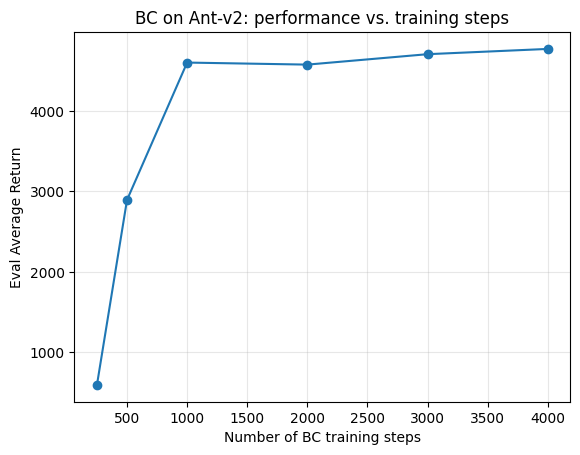

points: [(250, 594.7304077148438, 7.718839645385742), (500, 2893.815673828125, 1693.446533203125), (1000, 4601.8125, 126.97118377685547), (2000, 4576.3818359375, 71.62019348144531), (3000, 4706.0341796875, 30.551713943481445), (4000, 4771.44189453125, 67.28290557861328)]
saved: /content/16831-F25-HW/hw1/data/fig_p4_ant_train_steps.png


In [102]:
import re, glob, os
import matplotlib.pyplot as plt

# Where logs actually land for this repo
ROOT = "/content/16831-F25-HW/hw1"

# Two patterns: (1) trainer's default run dirs (2) your loop logs
patterns = [
    os.path.join(ROOT, "data", "q1_p4_ant_steps_*_Ant-v2_*", "log.txt"),
    os.path.join(ROOT, "data", "logs", "p4_ant_steps_*.log"),
]

# Regexes (robust to scientific notation)
re_steps_from_dir = re.compile(r"steps_(\d+)")
re_steps_from_file = re.compile(r"p4_ant_steps_(\d+)\.log$")
re_mean = re.compile(r"Eval_AverageReturn\s*:\s*([+-]?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?)")
re_std  = re.compile(r"Eval_StdReturn\s*:\s*([+-]?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?)")

records = {}
for pat in patterns:
    for log in sorted(glob.glob(pat)):
        # figure out steps from either path style
        m = re_steps_from_dir.search(log) or re_steps_from_file.search(log)
        if not m:
            continue
        steps = int(m.group(1))

        try:
            with open(log, "r") as f:
                txt = f.read()
        except OSError:
            continue

        m_mean = re_mean.search(txt)
        m_std  = re_std.search(txt)
        if not (m_mean and m_std):
            # skip logs that didn't finish printing metrics
            continue

        mean = float(m_mean.group(1))
        std  = float(m_std.group(1))

        # keep the latest seen entry for each steps value
        records[steps] = (steps, mean, std)

if not records:
    raise RuntimeError("No logs found. Check that runs finished and paths are correct.")

# Make sorted lists
steps_list = sorted(records)
mean_list  = [records[s][1] for s in steps_list]
std_list   = [records[s][2] for s in steps_list]

# Plot
plt.figure()
plt.errorbar(steps_list, mean_list, fmt='-o')
plt.xlabel("Number of BC training steps")
plt.ylabel("Eval Average Return")
plt.title("BC on Ant-v2: performance vs. training steps")
plt.grid(True, alpha=0.3)
outpath = os.path.join(ROOT, "data", "fig_p4_ant_train_steps.png")
plt.savefig(outpath, dpi=300, bbox_inches="tight")
plt.show()

print("points:", list(zip(steps_list, mean_list, std_list)))
print("saved:", outpath)

## Question 2 Part 2

In [63]:
%%bash
# DAgger on Ant-v2 and Humanoid-v2, quiet logs + harmless teardown tolerated
set +e
cd /content/16831-F25-HW/hw1

# ensure imports
touch rob831/__init__.py rob831/infrastructure/__init__.py rob831/scripts/__init__.py
export PYTHONPATH=.

# safe headless GL
export MUJOCO_GL=osmesa
unset LD_PRELOAD
export LD_LIBRARY_PATH=/root/.mujoco/mujoco210/bin:/usr/lib/x86_64-linux-gnu

mkdir -p data/logs

# ---- Ant-v2 ----
/usr/local/py38/bin/python -W ignore rob831/scripts/run_hw1.py \
  --expert_policy_file rob831/policies/experts/Ant.pkl \
  --expert_data rob831/expert_data/expert_data_Ant-v2.pkl \
  --env_name Ant-v2 \
  --exp_name dagger_ant \
  --n_iter 8 \
  --do_dagger \
  --n_layers 3 \
  --video_log_freq -1 \
  --no_gpu > data/logs/dagger_ant.log 2>&1 || echo "[info] Ant run exited (likely 134); see data/logs/dagger_ant.log"

# ---- Humanoid-v2 ----
/usr/local/py38/bin/python -W ignore rob831/scripts/run_hw1.py \
  --expert_policy_file rob831/policies/experts/Humanoid.pkl \
  --expert_data rob831/expert_data/expert_data_Humanoid-v2.pkl \
  --env_name Humanoid-v2 \
  --exp_name dagger_humanoid \
  --n_iter 8 \
  --do_dagger \
  --n_layers 3 \
  --video_log_freq -1 \
  --no_gpu > data/logs/dagger_humanoid.log 2>&1 || echo "[info] Humanoid run exited (likely 134); see data/logs/dagger_humanoid.log"

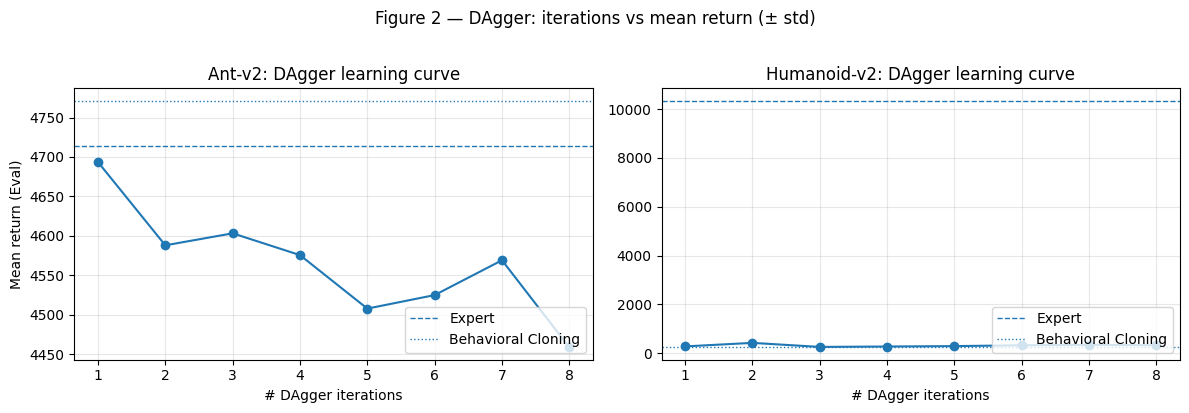

Saved Figure 2 to: /content/16831-F25-HW/hw1/data/figure_2_dagger_ant_humanoid.png
Ant  — expert: 4713.6533203125 BC: 4771.44189453125
Hum  — expert: 10344.517578125 BC: 254.61276245117188


In [95]:
import os, re, glob
import numpy as np
import matplotlib.pyplot as plt

ROOT = "/content/16831-F25-HW/hw1"
LOG_DAGGER_ANT = os.path.join(ROOT, "data", "logs", "dagger_ant.log")
LOG_DAGGER_HUM = os.path.join(ROOT, "data", "logs", "dagger_humanoid.log")

def parse_dagger_log(path):
    """Return (iters, mean, std, expert_mean) for a DAgger run."""
    with open(path, "r") as f:
        txt = f.read()
    # expert performance recorded at dataset collection
    m_exp = re.search(r"Initial_DataCollection_AverageReturn\s*:\s*([+-]?\d+(?:\.\d+)?)", txt)
    expert = float(m_exp.group(1)) if m_exp else None

    # collect per-iteration evals in order
    iters, means, stds = [], [], []
    # split by iteration header to be robust
    blocks = re.split(r"\*{10,}\s*Iteration\s+(\d+)\s*\*{10,}", txt)
    # blocks: ["prefix", iter0, block0, iter1, block1, ...]
    for k in range(1, len(blocks), 2):
        it = int(blocks[k])
        body = blocks[k+1]
        m_mean = re.search(r"Eval_AverageReturn\s*:\s*([+-]?\d+(?:\.\d+)?)", body)
        m_std  = re.search(r"Eval_StdReturn\s*:\s*([+-]?\d+(?:\.\d+)?)", body)
        if m_mean:
            iters.append(it+1)  # plot iterations starting from 1
            means.append(float(m_mean.group(1)))
            stds.append(float(m_std.group(1)) if m_std else 0.0)
    order = np.argsort(iters)
    iters = np.array(iters)[order]
    means = np.array(means)[order]
    stds  = np.array(stds)[order]
    return iters, means, stds, expert

def best_bc_ant():
    # Try cleaned loop logs first
    pats = [
        os.path.join(ROOT, "data", "logs", "p4_ant_steps_*.log"),
        os.path.join(ROOT, "data", "q1_p4_ant_steps_*_Ant-v2_*", "log.txt"),
    ]
    best = None
    for pat in pats:
        for fp in glob.glob(pat):
            with open(fp, "r") as f:
                t = f.read()
            m = re.search(r"Eval_AverageReturn\s*:\s*([+-]?\d+(?:\.\d+)?)", t)
            if m:
                val = float(m.group(1))
                if (best is None) or (val > best):
                    best = val
    return best

def bc_humanoid():
    # from the earlier clean run
    candidates = [
        os.path.join(ROOT, "data", "bc_humanoid_console.log"),
        os.path.join(ROOT, "humanoid_bc.txt"),
    ]
    for fp in candidates:
        if os.path.exists(fp):
            with open(fp, "r") as f:
                t = f.read()
            m = re.search(r"Eval_AverageReturn\s*:\s*([+-]?\d+(?:\.\d+)?)", t)
            if m:
                return float(m.group(1))
    return None

# Parse DAgger logs
it_ant, mean_ant, std_ant, expert_ant = parse_dagger_log(LOG_DAGGER_ANT)
it_hum, mean_hum, std_hum, expert_hum = parse_dagger_log(LOG_DAGGER_HUM)

# Baselines
bc_ant = best_bc_ant()
bc_hum = bc_humanoid()

# --- Plot Figure 2 (two panels) ---
fig, axes = plt.subplots(1, 2, figsize=(12, 4), sharey=False)

# Left: Ant-v2
ax = axes[0]
ax.errorbar(it_ant, mean_ant, yerr=std_ant, fmt='-o')
if expert_ant is not None:
    ax.axhline(expert_ant, linestyle='--', linewidth=1, label="Expert")
if bc_ant is not None:
    ax.axhline(bc_ant, linestyle=':', linewidth=1, label="Behavioral Cloning")
ax.set_title("Ant-v2: DAgger learning curve")
ax.set_xlabel("# DAgger iterations")
ax.set_ylabel("Mean return (Eval)")
ax.grid(True, alpha=0.3)
ax.legend(loc="lower right")

# Right: Humanoid-v2
ax = axes[1]
ax.errorbar(it_hum, mean_hum, yerr=std_hum, fmt='-o')
if expert_hum is not None:
    ax.axhline(expert_hum, linestyle='--', linewidth=1, label="Expert")
if bc_hum is not None:
    ax.axhline(bc_hum, linestyle=':', linewidth=1, label="Behavioral Cloning")
ax.set_title("Humanoid-v2: DAgger learning curve")
ax.set_xlabel("# DAgger iterations")
ax.grid(True, alpha=0.3)
ax.legend(loc="lower right")

plt.suptitle("Figure 2 — DAgger: iterations vs mean return (± std)", y=1.02)
plt.tight_layout()
out = os.path.join(ROOT, "data", "figure_2_dagger_ant_humanoid.png")
plt.savefig(out, dpi=300, bbox_inches="tight")
plt.show()

print("Saved Figure 2 to:", out)
print("Ant  — expert:", expert_ant, "BC:", bc_ant)
print("Hum  — expert:", expert_hum, "BC:", bc_hum)

In [65]:
%%bash
set -e

# --- paths ---
ROOT=/content/16831-F25-HW/hw1
OUT=$ROOT/submit
RUNLOGS=$OUT/run_logs

# fresh bundle
rm -rf "$OUT" "$ROOT/submit.zip"
mkdir -p "$RUNLOGS/BC" "$RUNLOGS/DAgger"

# ---------------------------
# 1) RUN LOGS (BC + DAgger)
# ---------------------------
# BC (Ant-v2): include at least one full run dir (trainer-made) and the cleaned loop logs (if any)
#   - pick your best "steps" directory (adjust the glob if your best is different)
ANT_DIR=$(ls -d "$ROOT/data"/q1_p4_ant_steps_*_Ant-v2_* 2>/dev/null | head -n1 || true)
if [[ -n "$ANT_DIR" ]]; then
  cp -r "$ANT_DIR" "$RUNLOGS/BC/"
fi

# also include your concise per-run logs (from the cleaned loops)
mkdir -p "$RUNLOGS/BC/ant_logs"
cp -f "$ROOT/data/logs"/p4_ant_steps_*.log "$RUNLOGS/BC/ant_logs/" 2>/dev/null || true

# BC (Humanoid-v2): include the clean console log if you ran it
if [[ -f "$ROOT/data/bc_humanoid_console.log" ]]; then
  mkdir -p "$RUNLOGS/BC/humanoid_logs"
  cp -f "$ROOT/data/bc_humanoid_console.log" "$RUNLOGS/BC/humanoid_logs/"
fi

# DAgger (Ant/Humanoid): include the clean console logs
mkdir -p "$RUNLOGS/DAgger"
cp -f "$ROOT/data/logs/dagger_ant.log" "$RUNLOGS/DAgger/" 2>/dev/null || true
cp -f "$ROOT/data/logs/dagger_humanoid.log" "$RUNLOGS/DAgger/" 2>/dev/null || true

# Strip any videos if some runs accidentally logged them
find "$RUNLOGS" -type f \( -iname "*.mp4" -o -iname "*.gif" -o -iname "*.avi" \) -delete || true

# ---------------------------------
# 2) CODE: the rob831/ source tree
# ---------------------------------
mkdir -p "$OUT"
rsync -a --exclude="__pycache__" --exclude="*.pyc" --exclude=".DS_Store" \
  "$ROOT/rob831" "$OUT/"

# --------------------------------------------------
# 3) Include your figures if already generated (opt)
# --------------------------------------------------
mkdir -p "$OUT/figures"
# Ant-v2 training steps figure from earlier (rename if yours differs)
cp -f "$ROOT/data/fig_p4_ant_train_steps.pdf" "$OUT/figures/" 2>/dev/null || true
# DAgger Figure 2
cp -f "$ROOT/data/figure_2_dagger_ant_humanoid.pdf" "$OUT/figures/" 2>/dev/null || true

# ------------------------------------------------
# 4) RUN.md with exact commands + env information
# ------------------------------------------------
cat > "$OUT/RUN.md" <<'MD'
# RUN.md — how to reproduce the submitted results

## Environment (tested)
- Python 3.8
- gym==0.21.0
- numpy==1.23.5
- mujoco-py==2.1.2.14
- glfw==2.5.5, PyOpenGL==3.1.7, Cython==0.29.36
- Headless rendering: `MUJOCO_GL=osmesa`

**Before running**, from the repo root (the folder that contains `rob831/`):
```bash
cd /content/16831-F25-HW/hw1
export PYTHONPATH=.
export MUJOCO_GL=osmesa
unset LD_PRELOAD
export LD_LIBRARY_PATH=/root/.mujoco/mujoco210/bin:/usr/lib/x86_64-linux-gnu

bash: line 76: warning: here-document at line 59 delimited by end-of-file (wanted `MD')


# For Submission

In [58]:
!git pull

remote: Enumerating objects: 15, done.
remote: Counting objects: 100% (15/15), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 9 (delta 7), reused 9 (delta 7), pack-reused 0 (from 0)
Unpacking objects: 100% (9/9), 1.89 KiB | 644.00 KiB/s, done.
From github.com:JH083/16831-F25-HW
   883bdde..4f60fb3  master     -> origin/master
Updating 883bdde..4f60fb3
Fast-forward
 hw1/.DS_Store                                      | Bin 6148 -> 8196 bytes
 hw1/{ant_bc.txt => RUN.md}                         |   0
 .../expert_data => data}/expert_summary.log        |   0
 hw1/data/q1_bc_ant.log                             |  37 +++++++++++++++++++++
 hw1/data/q1_bc_humanoid.log                        |  37 +++++++++++++++++++++
 .../events.out.tfevents.1758248410.f18d2a997560    | Bin 785 -> 0 bytes
 .../events.out.tfevents.1758249603.f18d2a997560    | Bin 6196 -> 0 bytes
 .../events.out.tfevents.1758249652.f18d2a997560    | Bin 6196 -> 0 bytes
 hw1/p4_ant_05.log                     

In [17]:
!git remote -v

origin	https://github.com/JH083/16831-F25-HW.git (fetch)
origin	https://github.com/JH083/16831-F25-HW.git (push)


In [59]:
!git add .

In [60]:
!git commit -m "run logs updated"

On branch master
Your branch is up to date with 'origin/master'.

nothing to commit, working tree clean


In [61]:
!git remote set-url origin https://github.com/JH083/16831-F25-HW.git


In [47]:
!cat ~/.ssh/id_ed25519.pub

ssh-ed25519 AAAAC3NzaC1lZDI1NTE5AAAAIF4AHXWFqfLMyYzCe5rFQw5Lwl9FnTNx5BtK2224HEI0 colab


In [62]:
!git push

fatal: could not read Username for 'https://github.com': No such device or address


In [44]:
%%bash
git remote set-url origin git@github.com:JH083/16831-F25-HW.git
git push -u origin master   # or main if that's your branch

Host key verification failed.
fatal: Could not read from remote repository.

Please make sure you have the correct access rights
and the repository exists.


CalledProcessError: Command 'b"git remote set-url origin git@github.com:JH083/16831-F25-HW.git\ngit push -u origin master   # or main if that's your branch\n"' returned non-zero exit status 128.

In [63]:
!ssh -T git@github.com

Hi JH083! You've successfully authenticated, but GitHub does not provide shell access.


In [64]:
!git pull

Already up to date.


In [48]:
%%bash
set -e

# 1) Make sure the key exists and permissions are correct
mkdir -p ~/.ssh
chmod 700 ~/.ssh
[[ -f ~/.ssh/id_ed25519 ]] || { echo "[err] No ~/.ssh/id_ed25519 found. Generate one first."; exit 1; }
chmod 600 ~/.ssh/id_ed25519
[[ -f ~/.ssh/id_ed25519.pub ]] || { echo "[err] No ~/.ssh/id_ed25519.pub found."; exit 1; }

# 2) Start agent and add the key
eval "$(ssh-agent -s)" >/dev/null
ssh-add -D >/dev/null 2>&1 || true
ssh-add ~/.ssh/id_ed25519

# 3) Ensure GitHub host key is trusted (avoid verification prompt)
ssh-keygen -R github.com >/dev/null 2>&1 || true
ssh-keyscan -H github.com >> ~/.ssh/known_hosts 2>/dev/null
chmod 644 ~/.ssh/known_hosts

# 4) Create a minimal SSH config to force this identity and (optionally) port 443 fallback
cat > ~/.ssh/config <<'CFG'
Host github.com
  Hostname github.com
  User git
  IdentityFile ~/.ssh/id_ed25519
  IdentitiesOnly yes
CFG
chmod 600 ~/.ssh/config

# 5) Quick verbose test (won't succeed if key not on your GitHub yet)
ssh -T -v git@github.com || true

Identity added: /root/.ssh/id_ed25519 (colab)
OpenSSH_8.9p1 Ubuntu-3ubuntu0.13, OpenSSL 3.0.2 15 Mar 2022
debug1: Reading configuration data /root/.ssh/config
debug1: /root/.ssh/config line 1: Applying options for github.com
debug1: Reading configuration data /etc/ssh/ssh_config
debug1: /etc/ssh/ssh_config line 19: include /etc/ssh/ssh_config.d/*.conf matched no files
debug1: /etc/ssh/ssh_config line 21: Applying options for *
debug1: Connecting to github.com [140.82.113.3] port 22.
debug1: Connection established.
debug1: identity file /root/.ssh/id_ed25519 type 3
debug1: identity file /root/.ssh/id_ed25519-cert type -1
debug1: Local version string SSH-2.0-OpenSSH_8.9p1 Ubuntu-3ubuntu0.13
debug1: Remote protocol version 2.0, remote software version cb24e083
debug1: compat_banner: no match: cb24e083
debug1: Authenticating to github.com:22 as 'git'
debug1: load_hostkeys: fopen /root/.ssh/known_hosts2: No such file or directory
debug1: load_hostkeys: fopen /etc/ssh/ssh_known_hosts: No suc

In [65]:
%%bash
cd /content/16831-F25-HW
git fetch origin
git checkout master
git status          # ensure no unstaged changes

# replay your local commit on top of origin/master
git rebase origin/master
# (if conflicts: edit files -> git add <fixed files> -> git rebase --continue)

# after rebase, push (may need force-with-lease because history changed)
git push -u origin master --force-with-lease

Your branch is up to date with 'origin/master'.
On branch master
Your branch is up to date with 'origin/master'.

nothing to commit, working tree clean
Current branch master is up to date.


Already on 'master'
fatal: could not read Username for 'https://github.com': No such device or address


CalledProcessError: Command 'b'cd /content/16831-F25-HW\ngit fetch origin\ngit checkout master\ngit status          # ensure no unstaged changes\n\n# replay your local commit on top of origin/master\ngit rebase origin/master\n# (if conflicts: edit files -> git add <fixed files> -> git rebase --continue)\n\n# after rebase, push (may need force-with-lease because history changed)\ngit push -u origin master --force-with-lease\n'' returned non-zero exit status 128.

In [104]:
!git add .

In [105]:
!git commit -m "added image"

[master dcb1b98] added image
 2 files changed, 0 insertions(+), 0 deletions(-)
 create mode 100644 hw1/data/fig_p4_ant_train_steps.png


In [26]:
!git push

fatal: could not read Username for 'https://github.com': No such device or address
